In [191]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv('/Users/max/Downloads/NETOLOGY/DVP/Итоговое задание/taxi.csv')
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [192]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


Сразу можно увидеть, что колонки offer_gk, driver_gk, order_gk не понадобятся нам, так они обозначают номера предложения, заказа, номер службы такси  или водителя. Удаляем их.

In [193]:
data = data.drop(['offer_gk', 'driver_gk', 'order_gk'], axis=1)

In [194]:
data.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.159860,13.827790,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,2.054222,7.306496,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,8.000000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,3.000000,16.000000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,5.000000,20.000000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,6.000000,23.000000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [195]:
data['weekday_key'].unique()

array([5, 6, 2, 4, 3, 1, 0])

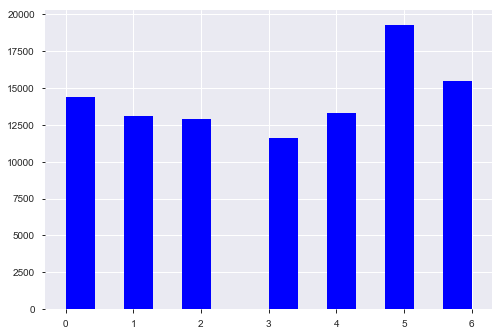

In [196]:
n, bins, patches = plt.hist(data['weekday_key'], 14, facecolor='b')

Смотрю распределение, в принципе все смотрится логично. в пятницу, день 5, больше всего поездок, суббота - 6 на втором месте, на третьем воскресенье. Вижу, что выбросов в этом признаке нет.

In [197]:
data['hour_key'].unique()

array([20, 14,  6, 16, 15, 11,  7, 10, 12,  8,  9, 21, 17, 23, 13, 18,  5,
       19, 22,  0,  2,  3,  1,  4])

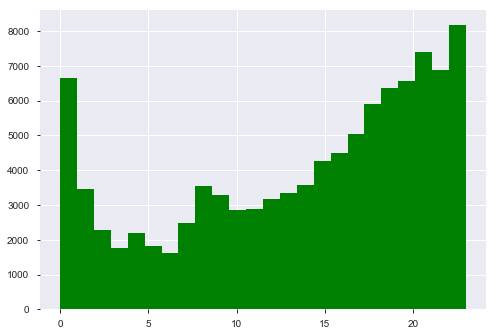

In [59]:
n, bins, patches = plt.hist(data['hour_key'], 24, facecolor='g')

здесь тоже все выглядит неплохо, логично. Если придставить, что 23-0 часа это середина, то есть график можно отсимметрить относительно 23 часов, то распределение очень похожее на нормальное

In [9]:
import pandas_profiling
data.profile_report()

Профайлинг показал, что отсутствуют пропущенные значения, что уже хорошо.

с помощью координат водителя и координат потенциального пассажира можно создать новый, считаю полезный, признак расстояние до заказа. Этот признак важный, так как бывает так что водитель может не взять заказ если до него слишком далеко ехать.
Функцию нашел на стек оверфлоу. Но сперва надо проверить координаты на выбросы...

In [60]:
from math import cos, asin, sqrt
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))

По дискрайб вижу отрицательные значения координат, странно. Посмотрим сколько их

In [198]:
data.query('driver_latitude < 0').shape

(140, 11)

Всего 140 строк с отрицательным значением,удаляем

In [199]:
data = data.query('driver_latitude > 0')

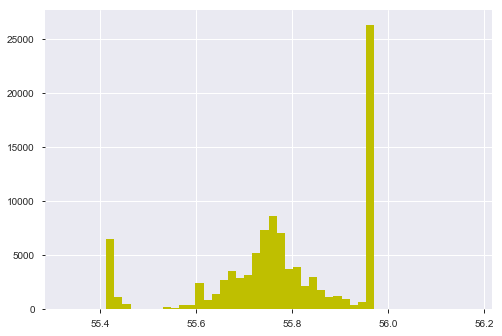

In [200]:
n, bins, patches = plt.hist(data['driver_latitude'], 50, facecolor='y')

driver_latitude	driver_longitude	origin_order_latitude	origin_order_longitude

In [201]:
data.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,99859.000000,99859.000000,99859.000000,99859.000000,99859.000000,99859.000000,99859.000000,99859.000000,99859.000000
mean,3.160096,13.826926,55.780875,37.546633,55.772803,37.541293,18.410788,23.158264,0.491773
std,2.054446,7.308149,0.153848,0.157057,0.666353,0.467938,41.148560,33.899469,0.499935
min,0.000000,0.000000,55.327636,36.984771,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,8.000000,55.709284,37.413497,55.708492,37.407117,-1.000000,-1.000000,0.000000
50%,3.000000,16.000000,55.773063,37.533882,55.772677,37.532150,10.441000,19.750000,0.000000
75%,5.000000,20.000000,55.960695,37.624246,55.962033,37.624139,30.686500,37.883000,1.000000
max,6.000000,23.000000,56.174097,38.280547,56.172361,38.243608,5234.283000,3958.283000,1.000000


проверяем остальные координаты по такому же принципу. По дискрайбу выше видим, что отрицательные значения остались у колонок origin_order

In [202]:
data.query('origin_order_latitude < 0').shape

(13, 11)

In [203]:
data = data.query('origin_order_latitude > 0')

In [204]:
data.query('origin_order_longitude < 0').shape

(0, 11)

Смотрим на дистанст и дьюрейшен, отрицательных значений быть не должно

In [205]:
check = data.query('distance_km < 0')

In [206]:
data.query('duration_min < 0').shape

(26083, 11)

In [207]:
check['distance_km'].unique()

array([-1.])

In [208]:
check['duration_min'].unique()

array([-1.])

In [209]:
data.query('distance_km < 0').shape

(26083, 11)

In [210]:
data.shape

(99846, 11)

In [211]:
26083/99846

0.2612322977385173

Таких значений много, 26 проц от всего датасета. Если предположить, что ошибка только в знаке минус и значение дистанции 1 км всего, это немного. Хотя, допустим в дождь(или от метро) проехать 1 км более менее адекватно. проанализирую сколько таксист принимал таких заказов.

In [212]:
check.query('driver_response==0').shape

(11772, 11)

In [213]:
check.query('driver_response==1').shape

(14311, 11)

Пока оставляем. Но выбираю абсолютные значения только. Убираю знак минус.

In [214]:
data['distance_km']=data.distance_km.abs()

In [215]:
data['duration_min']=data.duration_min.abs()

In [216]:
data.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000,99846.000000
mean,3.160087,13.826633,55.780883,37.546631,55.780195,37.546311,18.934220,23.681495,0.491757
std,2.054477,7.308449,0.153851,0.157053,0.156106,0.159887,40.913102,33.538382,0.499935
min,0.000000,0.000000,55.327636,36.984771,55.327917,36.994072,0.000000,0.000000,0.000000
25%,1.000000,8.000000,55.709285,37.413497,55.708502,37.407117,1.000000,1.000000,0.000000
50%,3.000000,16.000000,55.773085,37.533874,55.772734,37.532189,10.441500,19.750000,0.000000
75%,5.000000,20.000000,55.960697,37.624235,55.962035,37.624145,30.694750,37.883000,1.000000
max,6.000000,23.000000,56.174097,38.280547,56.172361,38.243608,5234.283000,3958.283000,1.000000


 Теперь проверяю максимальные значения

In [217]:
data.query('distance_km > 100').shape

(174, 11)

174 немного от общего датасета, удаляем такие строки

In [218]:
data.shape

(99846, 11)

In [219]:
data = data.query('distance_km < 100')

In [220]:
data.shape

(99672, 11)

In [221]:
data.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,99672.000000,99672.000000,99672.000000,99672.000000,99672.000000,99672.000000,99672.000000,99672.000000,99672.000000
mean,3.159824,13.827755,55.781100,37.546427,55.780417,37.546100,18.197631,23.127388,0.491723
std,2.054279,7.307195,0.153636,0.156847,0.155884,0.159668,19.544176,20.021920,0.499934
min,0.000000,0.000000,55.327636,36.984771,55.327917,36.994072,0.000000,0.000000,0.000000
25%,1.000000,8.000000,55.709442,37.413497,55.708755,37.407117,1.000000,1.000000,0.000000
50%,3.000000,16.000000,55.773193,37.533785,55.772796,37.532084,10.397000,19.683000,0.000000
75%,5.000000,20.000000,55.960723,37.624056,55.962041,37.623826,30.507750,37.767000,1.000000
max,6.000000,23.000000,56.174097,38.280547,56.172361,38.243608,99.596000,108.550000,1.000000


Смотрим столбец драйвер респонс, тут два варианта либо 1 либо 0

In [222]:
data['driver_response'].unique()

array([0, 1])

In [223]:
data.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,1.000,1.000,Economy,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,1.000,1.000,Economy,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [224]:
data['offer_class_group'].unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

Вижу что в столбце offer_class_group довольно много категорий. по результатам профайлинга удаляю 2600 строк, то есть оставляю только категории Economy, standard, premium.

In [225]:
len(data[(data['offer_class_group']=='Economy')|(data['offer_class_group']=='Standard')|(data['offer_class_group']=='Premium')])

97079

In [226]:
data = data[(data['offer_class_group']=='Economy')|(data['offer_class_group']=='Standard')|(data['offer_class_group']=='Premium')]

In [227]:
data['ride_type_desc'].unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

из профайлинга вижу, что можно оставить только две категории типа поездки это 'private', 'business'

In [228]:
len(data[(data['ride_type_desc']=='private')|(data['ride_type_desc']=='business')])

96828

In [229]:
data = data[(data['ride_type_desc']=='private')|(data['ride_type_desc']=='business')]

Созданю новый признак расстояние до заказа от позиции водителя

In [230]:
from math import cos, asin, sqrt
def distance(data):
    lat1=data['driver_latitude']
    lon1=data['driver_longitude']
    lat2=data['origin_order_latitude']
    lon2=data['origin_order_longitude']
    p = 0.017453292519943295
    a = 0.5 - cos((lat2 - lat1) * p)/2 + cos(lat1 * p) * cos(lat2 * p) * (1 - cos((lon2 - lon1) * p)) / 2
    return 12742 * asin(sqrt(a))

In [231]:
data['distance_driver-person']=data.apply(distance, axis=1)

In [232]:
data = data.drop(['driver_latitude','driver_longitude','origin_order_latitude','origin_order_longitude'], axis=1)

In [233]:
data.head()

,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_driver-person
0,5,20,1.000,1.000,Economy,private,0,1.363045
1,5,14,18.802,25.217,Standard,private,1,3.413092
2,6,14,6.747,9.800,Economy,private,0,0.409999
3,2,6,1.000,1.000,Economy,private,1,0.647472
4,4,16,12.383,19.250,Economy,private,1,1.062481


In [234]:
def part_of_day(data):
    if data['hour_key'] in range(3,9):
        return 'Morning'
    if data['hour_key'] in range(9,16):
        return 'Day'
    if data['hour_key'] in range(16,22):
        return 'Evening'
    else:
        return 'Night'

In [235]:
data['part_of_day']=data.apply(part_of_day, axis=1)

In [236]:
data.head()

,weekday_key,hour_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_driver-person,part_of_day
0,5,20,1.000,1.000,Economy,private,0,1.363045,Evening
1,5,14,18.802,25.217,Standard,private,1,3.413092,Day
2,6,14,6.747,9.800,Economy,private,0,0.409999,Day
3,2,6,1.000,1.000,Economy,private,1,0.647472,Morning
4,4,16,12.383,19.250,Economy,private,1,1.062481,Evening


In [238]:
data = data.drop('hour_key', axis=1)

In [239]:
data.head()

,weekday_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_driver-person,part_of_day
0,5,1.000,1.000,Economy,private,0,1.363045,Evening
1,5,18.802,25.217,Standard,private,1,3.413092,Day
2,6,6.747,9.800,Economy,private,0,0.409999,Day
3,2,1.000,1.000,Economy,private,1,0.647472,Morning
4,4,12.383,19.250,Economy,private,1,1.062481,Evening


In [240]:
day = pd.get_dummies(data['part_of_day'])

In [241]:
data = pd.concat([data,day],axis=1)

In [242]:
offer_class = pd.get_dummies(data['offer_class_group'])
ride_type = pd.get_dummies(data['ride_type_desc'])
weekday = pd.get_dummies(data['weekday_key'])

In [243]:
data = pd.concat([data,offer_class, ride_type, weekday],axis=1)

In [244]:
data.head()

,weekday_key,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance_driver-person,part_of_day,Day,Evening,...,Standard,business,private,0,1,2,3,4,5,6
0,5,1.000,1.000,Economy,private,0,1.363045,Evening,0,1,...,0,0,1,0,0,0,0,0,1,0
1,5,18.802,25.217,Standard,private,1,3.413092,Day,1,0,...,1,0,1,0,0,0,0,0,1,0
2,6,6.747,9.800,Economy,private,0,0.409999,Day,1,0,...,0,0,1,0,0,0,0,0,0,1
3,2,1.000,1.000,Economy,private,1,0.647472,Morning,0,0,...,0,0,1,0,0,1,0,0,0,0
4,4,12.383,19.250,Economy,private,1,1.062481,Evening,0,1,...,0,0,1,0,0,0,0,1,0,0


In [245]:
data = data.drop(['offer_class_group','ride_type_desc', 'weekday_key'], axis=1)

In [246]:
data = data.drop('part_of_day', axis=1)

In [247]:
target_value=data['driver_response']

In [248]:
data = data.drop('driver_response', axis=1)

In [249]:
data = pd.concat([data,target_value],axis=1)

In [250]:
data.head()

,distance_km,duration_min,distance_driver-person,Day,Evening,Morning,Night,Economy,Premium,Standard,business,private,0,1,2,3,4,5,6,driver_response
0,1.000,1.000,1.363045,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,18.802,25.217,3.413092,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
2,6.747,9.800,0.409999,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,1.000,1.000,0.647472,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,12.383,19.250,1.062481,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1


In [251]:
X_columns = data.columns[:-1]
Y_column = data.columns[-1]

In [252]:
X = data[X_columns]
Y = data[Y_column]

Делим данные на тренировочные и тестовые

In [253]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [254]:
X_train.shape, X_test.shape

((77462, 19), (19366, 19))

In [255]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [256]:
model.score(X_test, Y_test)

0.6949808943509242

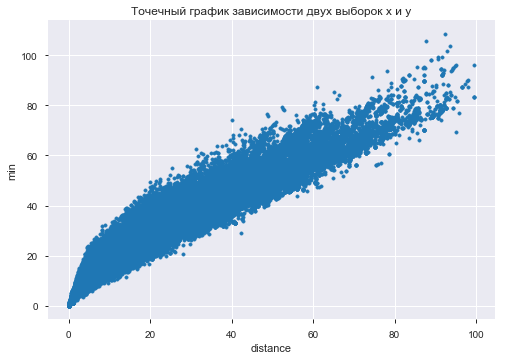

In [263]:
distance = data['distance_km']
duration = data['duration_min']
plt.xlabel('distance')
plt.ylabel('min')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(distance, duration, marker='.')

продолжительность поездки и расстояние сильно коррелируют. Пробуем удалить один признак и посмотрим на результат точности модели

In [264]:
data = data.drop('distance_km', axis=1)

In [267]:
X_columns = data.columns[:-1]
Y_column = data.columns[-1]

In [268]:
X = data[X_columns]
Y = data[Y_column]

Попробуем обучить модель, предварительно удалив 26 тыс строк с единицами в колонке дистанс и дьюрейшен

In [269]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [270]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [271]:
model.score(X_test, Y_test)

0.6778374470721884

Пробую удалить значения строк дистанс и продолжительность поездки, которые равны единице

In [281]:
data.query('duration_min == 1').shape

(25275, 19)

In [284]:
data = data.query('duration_min > 1')

In [285]:
X_columns = data.columns[:-1]
Y_column = data.columns[-1]
X = data[X_columns]
Y = data[Y_column]

In [286]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [287]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [288]:
model.score(X_test, Y_test)

0.6808629868310451

примененный фильтр не привел к улучшению результата